In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/machine-learning-zoomcamp/Module8

/content/drive/MyDrive/machine-learning-zoomcamp/Module8


In [3]:
!pwd

/content/drive/MyDrive/machine-learning-zoomcamp/Module8


### Dataset

In [ ]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 15.72 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (3783/3783), done.


In [ ]:
!ls clothing-dataset-small

LICENSE  README.md  test  train  validation


### Tensorflow & Keras

In [4]:
import os
import glob
import random

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

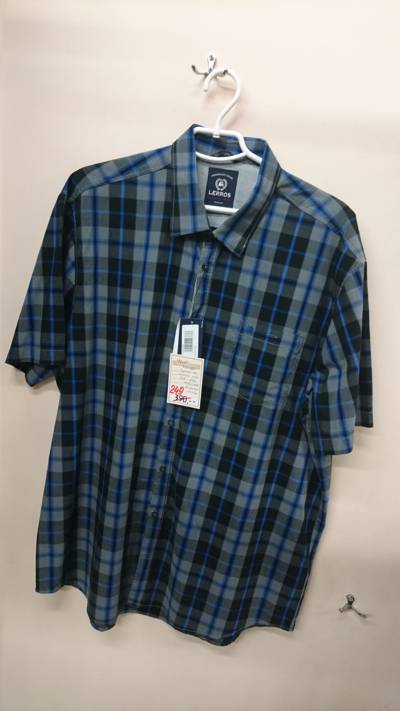

In [5]:
images = glob.glob("clothing-dataset-small/**/**/*.jpg")
random_image = images[np.random.randint(len(images))]

load_img(random_image)

In [6]:
img = load_img(random_image, target_size=(224, 224))
print(np.array(img))

[[[214 201 185]
  [218 205 189]
  [217 204 188]
  ...
  [248 241 231]
  [248 241 231]
  [248 241 231]]

 [[214 201 185]
  [218 205 189]
  [217 204 188]
  ...
  [248 241 231]
  [248 241 231]
  [248 241 231]]

 [[214 201 185]
  [218 205 189]
  [217 204 188]
  ...
  [248 241 231]
  [248 241 231]
  [248 241 231]]

 ...

 [[180 170 158]
  [182 172 160]
  [183 173 161]
  ...
  [161 151 141]
  [161 151 141]
  [161 151 141]]

 [[179 169 159]
  [180 170 160]
  [181 171 161]
  ...
  [164 150 141]
  [164 150 141]
  [162 148 139]]

 [[178 168 158]
  [178 168 158]
  [179 169 159]
  ...
  [163 149 140]
  [162 148 139]
  [161 147 138]]]


In [7]:
print(np.array(img).shape)

(224, 224, 3)


### Pre-trained Convolutional Neural Network

In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [9]:
model = Xception(weights="imagenet", input_shape=(299, 299, 3))

91884032/91884032 [==============================] - 0s 0us/step


In [10]:
X = load_img(random_image, target_size=(299, 299))
X = np.array(X)
X = np.expand_dims(X, axis=0)

print(X.shape)

(1, 299, 299, 3)


In [11]:
model.predict(X)

1/1 [==============================] - 9s 9s/step


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [12]:
X = preprocess_input(X)

In [13]:
X[0]

array([[[0.6784314 , 0.5764706 , 0.45098042],
        [0.70980394, 0.60784316, 0.48235297],
        [0.70980394, 0.60784316, 0.48235297],
        ...,
        [0.94509804, 0.8901961 , 0.8117647 ],
        [0.94509804, 0.8901961 , 0.8117647 ],
        [0.94509804, 0.8901961 , 0.8117647 ]],

       [[0.6784314 , 0.5764706 , 0.45098042],
        [0.70980394, 0.60784316, 0.48235297],
        [0.70980394, 0.60784316, 0.48235297],
        ...,
        [0.94509804, 0.8901961 , 0.8117647 ],
        [0.94509804, 0.8901961 , 0.8117647 ],
        [0.94509804, 0.8901961 , 0.8117647 ]],

       [[0.6784314 , 0.5764706 , 0.45098042],
        [0.70980394, 0.60784316, 0.48235297],
        [0.70980394, 0.60784316, 0.48235297],
        ...,
        [0.94509804, 0.8901961 , 0.8117647 ],
        [0.94509804, 0.8901961 , 0.8117647 ],
        [0.94509804, 0.8901961 , 0.8117647 ]],

       ...,

       [[0.41176474, 0.33333337, 0.254902  ],
        [0.41176474, 0.33333337, 0.254902  ],
        [0.41960788, 0

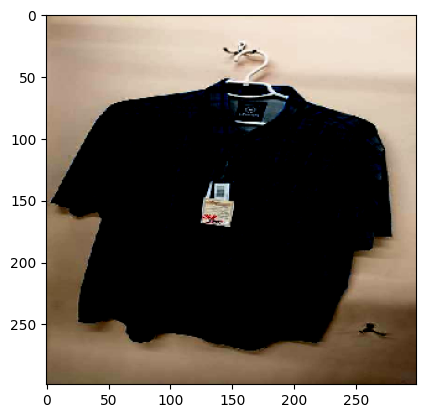

In [14]:
plt.imshow(X[0])

In [15]:
pred = model.predict(X)
print(pred.shape)

1/1 [==============================] - 1s 720ms/step
(1, 1000)


In [16]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n04370456', 'sweatshirt', 0.0920367),
  ('n03045698', 'cloak', 0.0635608),
  ('n04599235', 'wool', 0.061843637),
  ('n03980874', 'poncho', 0.050638005),
  ('n03877472', 'pajama', 0.0506052)]]

### Transfer learning

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_gen = ImageDataGenerator(
     preprocessing_function=preprocess_input
)

In [19]:
train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train",
    target_size=(150, 150),
    batch_size=32,

)

Found 3068 images belonging to 10 classes.


In [20]:
print(train_ds.class_indices)

{'dress': 0, 'hat': 1, 'longsleeve': 2, 'outwear': 3, 'pants': 4, 'shirt': 5, 'shoes': 6, 'shorts': 7, 'skirt': 8, 't-shirt': 9}


In [21]:
X, y = next(train_ds)

In [22]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [23]:
# Base model
base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 [==============================] - 0s 0us/step


In [24]:
preds = model.predict(X)
print(preds.shape)

1/1 [==============================] - 2s 2s/step
(32, 10)


In [25]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [26]:
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)

Epoch 1/10
96/96 [==============================] - 743s 8s/step - loss: 1.3135 - accuracy: 0.6594 - val_loss: 0.8598 - val_accuracy: 0.7683
Epoch 2/10
96/96 [==============================] - 322s 3s/step - loss: 0.5307 - accuracy: 0.8370 - val_loss: 0.8202 - val_accuracy: 0.7771
Epoch 3/10
96/96 [==============================] - 321s 3s/step - loss: 0.3489 - accuracy: 0.8869 - val_loss: 0.8407 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 320s 3s/step - loss: 0.2249 - accuracy: 0.9228 - val_loss: 0.9760 - val_accuracy: 0.7977
Epoch 5/10
96/96 [==============================] - 321s 3s/step - loss: 0.1670 - accuracy: 0.9423 - val_loss: 0.8858 - val_accuracy: 0.8094
Epoch 6/10
96/96 [==============================] - 319s 3s/step - loss: 0.1250 - accuracy: 0.9563 - val_loss: 0.9598 - val_accuracy: 0.8123
Epoch 7/10
96/96 [==============================] - 321s 3s/step - loss: 0.0848 - accuracy: 0.9710 - val_loss: 0.9438 - val_accuracy: 0.7859
Epoch 8/10
96

In [ ]:
print(history)

In [ ]:
print(history.history)

{'loss': [1.3135439157485962, 0.530749499797821, 0.3488639295101166, 0.22489386796951294, 0.1670420616865158, 0.12497571110725403, 0.0847577303647995, 0.04041942581534386, 0.04561886191368103, 0.054512836039066315], 'accuracy': [0.6593872308731079, 0.837027370929718, 0.8868970274925232, 0.9227509498596191, 0.942307710647583, 0.9563233256340027, 0.9709908962249756, 0.9918513894081116, 0.9898957014083862, 0.9850065112113953], 'val_loss': [0.8598291873931885, 0.8201594352722168, 0.8407005071640015, 0.9760245680809021, 0.8858396410942078, 0.9598250985145569, 0.9437766671180725, 0.8627901077270508, 0.8807168006896973, 0.9072598814964294], 'val_accuracy': [0.7683284282684326, 0.7771260738372803, 0.8093841671943665, 0.7976539731025696, 0.8093841671943665, 0.8123167157173157, 0.7859237790107727, 0.8211143612861633, 0.8211143612861633, 0.8211143612861633]}


In [ ]:
if not os.path.isdir("dumps"):
  os.mkdir("dumps")

In [ ]:
import json

with open("dumps/xception_model_training_history.json", "w") as f:
  json.dump(history.history, f)

In [28]:
import json

with open("dumps/xception_model_training_history.json", "r") as f:
  stored_history = json.load(f)

In [29]:
print(stored_history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


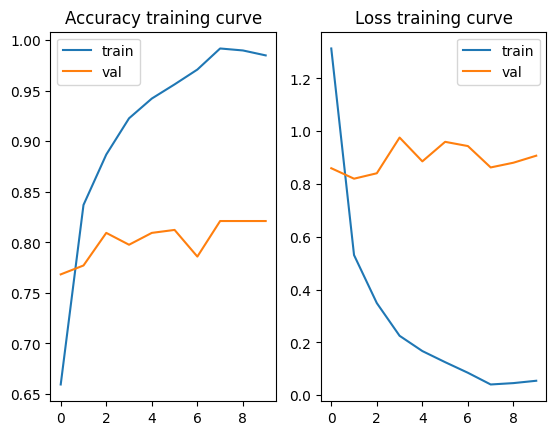

In [34]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(stored_history["accuracy"], label="train")
ax[0].plot(stored_history["val_accuracy"], label="val")
ax[0].set_title("Accuracy training curve")
ax[0].legend()

ax[1].plot(stored_history["loss"], label="train")
ax[1].plot(stored_history["val_loss"], label="val")
ax[1].set_title("Loss training curve")
ax[1].legend()

# 8.6 Adjusting the Learning Rate

In [35]:
def make_model(learning_rate=0.01):
  """Create an instance of the model"""
  base_model = Xception(
      weights="imagenet",
      include_top=False,
      input_shape=(150, 150, 3)
  )

  base_model.trainable = False

  inputs = keras.Input(shape=(150, 150, 3))

  base = base_model(inputs, training=False)

  vectors = keras.layers.GlobalAveragePooling2D()(base)
  outputs = keras.layers.Dense(10)(vectors)

  model = keras.Model(inputs, outputs)

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=["accuracy"]
  )

  return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
  print(f"Learning rate: {lr}")

  model = make_model(lr)
  history = model.fit(
      train_ds,
      epochs=10,
      validation_data=val_ds
  )

  scores[lr] = history.history
  print("=================================\n")

## 8.7 Checkpointing

- Saving the model when a particular condition is met

- Can be used to save the best model only

- Callbacks can be used to perform a specific operation with the model after en epoch

In [37]:
# Creating a checkpoint using callbacks
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
)

In [38]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

# Train the model
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.1057 - accuracy: 0.6268

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 792s 8s/step - loss: 1.1057 - accuracy: 0.6268 - val_loss: 0.7004 - val_accuracy: 0.7830
Epoch 2/10
96/96 [==============================] - 13s 132ms/step - loss: 0.6301 - accuracy: 0.7816 - val_loss: 0.5877 - val_accuracy: 0.8123
Epoch 3/10
96/96 [==============================] - 12s 130ms/step - loss: 0.5043 - accuracy: 0.8308 - val_loss: 0.5605 - val_accuracy: 0.8182
Epoch 4/10
96/96 [==============================] - 12s 122ms/step - loss: 0.4284 - accuracy: 0.8625 - val_loss: 0.5681 - val_accuracy: 0.8006
Epoch 5/10
96/96 [==============================] - 12s 124ms/step - loss: 0.3674 - accuracy: 0.8911 - val_loss: 0.5382 - val_accuracy: 0.8006
Epoch 6/10
96/96 [==============================] - 13s 134ms/step - loss: 0.3217 - accuracy: 0.9078 - val_loss: 0.5451 - val_accuracy: 0.8065
Epoch 7/10
96/96 [==============================] - 14s 141ms/step - loss: 0.2908 - accuracy: 0.9208 - val_loss: 0.5384 - val_accuracy: 0.8299
Epoch 8/10
9

In [40]:
print(history)

## 8.8 Adding More Dense Layers

- Adding one inner dense layer
- Experimenting with different sizes of inner layer


In [41]:
def make_model(learning_rate=0.01, size_inner=100):
  """Create an instance of the model"""
  base_model = Xception(
      weights="imagenet",
      include_top=False,
      input_shape=(150, 150, 3)
  )

  base_model.trainable = False

  inputs = keras.Input(shape=(150, 150, 3))

  base = base_model(inputs, training=False)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
  outputs = keras.layers.Dense(10)(inner)

  model = keras.Model(inputs, outputs)

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=["accuracy"]
  )

  return model

In [42]:
scores = {}

# Iterate through the inner layer sizes
for size in [10, 100, 1000]:
  print(f"Size: {size}")

  model = make_model(
      learning_rate=learning_rate,
      size_inner=size
  )
  history = model.fit(
      train_ds,
      epochs=10,
      validation_data=val_ds
  )
  scores[size] = history.history
  print("\n\n=========================\n\n")

Size: 10
Epoch 1/10
96/96 [==============================] - 16s 132ms/step - loss: 1.5821 - accuracy: 0.4345 - val_loss: 1.0720 - val_accuracy: 0.6334
Epoch 2/10
96/96 [==============================] - 12s 125ms/step - loss: 0.9178 - accuracy: 0.7014 - val_loss: 0.7653 - val_accuracy: 0.7595
Epoch 3/10
96/96 [==============================] - 17s 171ms/step - loss: 0.6603 - accuracy: 0.7901 - val_loss: 0.6665 - val_accuracy: 0.7859
Epoch 4/10
96/96 [==============================] - 17s 175ms/step - loss: 0.5292 - accuracy: 0.8315 - val_loss: 0.6095 - val_accuracy: 0.8006
Epoch 5/10
96/96 [==============================] - 13s 130ms/step - loss: 0.4386 - accuracy: 0.8592 - val_loss: 0.5942 - val_accuracy: 0.7889
Epoch 6/10
96/96 [==============================] - 17s 174ms/step - loss: 0.3648 - accuracy: 0.8908 - val_loss: 0.5903 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 17s 181ms/step - loss: 0.3121 - accuracy: 0.9107 - val_loss: 0.5523 - val_accurac

Text(0.5, 1.0, 'Training curve for the validation accuracy')

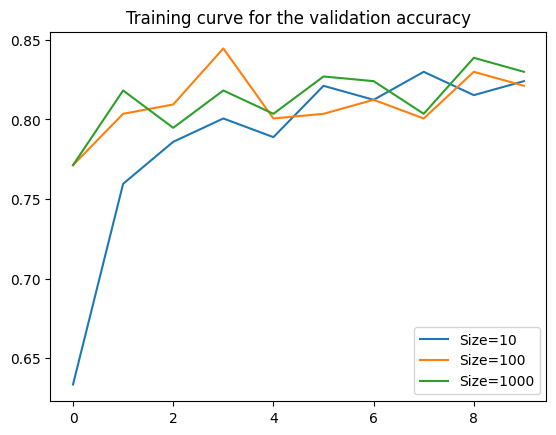

In [44]:
# Plotting the training performance curves
for size, hist in scores.items():
  plt.plot(hist["val_accuracy"], label=f"Size={size}")

plt.legend()
plt.title("Training curve for the validation accuracy")

## 8.9 Regularization & Dropout

- Using dropout, we can freeze out a number of neurons in a layer. This prevents the parameters associated with the layer from being updated.


In [45]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
  """Create an instance of the model"""
  base_model = Xception(
      weights="imagenet",
      include_top=False,
      input_shape=(150, 150, 3)
  )

  base_model.trainable = False

  inputs = keras.Input(shape=(150, 150, 3))

  base = base_model(inputs, training=False)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
  drop = keras.layers.Dropout(droprate)(inner)
  outputs = keras.layers.Dense(10)(drop)

  model = keras.Model(inputs, outputs)

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=["accuracy"]
  )

  return model

In [46]:
# Finding the best droprate
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0, 0.2, 0.5, 0.8]:
  print(f"Drop rate: {droprate}")

  model = make_model(
      learning_rate=learning_rate,
      size_inner=size,
      droprate=droprate
  )

  history = model.fit(
      train_ds,
      epochs=20,
      validation_data=val_ds
  )
  scores[droprate] = history.history

  print("\n\n==========================\n\n")

Drop rate: 0
Epoch 1/20
96/96 [==============================] - 16s 133ms/step - loss: 0.9706 - accuracy: 0.6653 - val_loss: 0.6974 - val_accuracy: 0.7713
Epoch 2/20
96/96 [==============================] - 12s 124ms/step - loss: 0.5201 - accuracy: 0.8194 - val_loss: 0.5588 - val_accuracy: 0.8240
Epoch 3/20
96/96 [==============================] - 12s 123ms/step - loss: 0.3595 - accuracy: 0.8768 - val_loss: 0.5900 - val_accuracy: 0.7859
Epoch 4/20
96/96 [==============================] - 13s 134ms/step - loss: 0.2667 - accuracy: 0.9162 - val_loss: 0.5843 - val_accuracy: 0.8006
Epoch 5/20
96/96 [==============================] - 12s 121ms/step - loss: 0.1779 - accuracy: 0.9524 - val_loss: 0.5983 - val_accuracy: 0.8065
Epoch 6/20
96/96 [==============================] - 15s 158ms/step - loss: 0.1315 - accuracy: 0.9668 - val_loss: 0.5738 - val_accuracy: 0.8182
Epoch 7/20
96/96 [==============================] - 12s 122ms/step - loss: 0.0884 - accuracy: 0.9847 - val_loss: 0.5884 - val_acc

## 8.10 Data Augmentations

- Different forms of data augmentation
- Training a model with data augmentations
- How to select the right data augmentations?

### Possible Image Augmentations
- Rotation
- Shifting (across the height or width)
- Shear Transformation
- Zoom


- Always use your judgement to choose the specific augmentations to use based on the nature of the images in the dataset

- Treat augmentations as a hyperparameter. Tune the augmentations used and select the best based on how it positively impacts the overall performance of the model.

In [47]:
## Define the image data generators with the parameters for augmentation
# Training
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True
)

train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train",
    target_size=(150, 150),
    batch_size=32
)

# Validation
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [48]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds
)

Epoch 1/20
96/96 [==============================] - 34s 316ms/step - loss: 1.2635 - accuracy: 0.5815 - val_loss: 0.8211 - val_accuracy: 0.7478
Epoch 2/20
96/96 [==============================] - 30s 308ms/step - loss: 0.8931 - accuracy: 0.6962 - val_loss: 0.7062 - val_accuracy: 0.7654
Epoch 3/20
96/96 [==============================] - 29s 297ms/step - loss: 0.7824 - accuracy: 0.7308 - val_loss: 0.7154 - val_accuracy: 0.7537
Epoch 4/20
96/96 [==============================] - 28s 294ms/step - loss: 0.7291 - accuracy: 0.7451 - val_loss: 0.6623 - val_accuracy: 0.7859
Epoch 5/20
96/96 [==============================] - 28s 291ms/step - loss: 0.6348 - accuracy: 0.7790 - val_loss: 0.6934 - val_accuracy: 0.7801
Epoch 6/20
96/96 [==============================] - 31s 319ms/step - loss: 0.6072 - accuracy: 0.7943 - val_loss: 0.6373 - val_accuracy: 0.7830
Epoch 7/20
96/96 [==============================] - 28s 296ms/step - loss: 0.5449 - accuracy: 0.8139 - val_loss: 0.6047 - val_accuracy: 0.8035

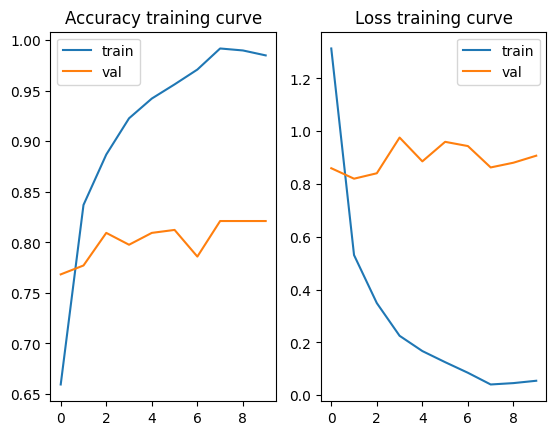

In [49]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(stored_history["accuracy"], label="train")
ax[0].plot(stored_history["val_accuracy"], label="val")
ax[0].set_title("Accuracy training curve")
ax[0].legend()

ax[1].plot(stored_history["loss"], label="train")
ax[1].plot(stored_history["val_loss"], label="val")
ax[1].set_title("Loss training curve")
ax[1].legend()

## 8.11 Training a larger model

- Using 299 x 299 images

In [61]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.2):
  """Create an instance of the model"""
  base_model = Xception(
      weights="imagenet",
      include_top=False,
      input_shape=(input_size, input_size, 3)
  )

  base_model.trainable = False

  inputs = keras.Input(shape=(input_size, input_size, 3))

  base = base_model(inputs, training=False)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
  drop = keras.layers.Dropout(droprate)(inner)
  outputs = keras.layers.Dense(10)(drop)

  model = keras.Model(inputs, outputs)

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=["accuracy"]
  )

  return model

In [62]:
input_size = 299

In [63]:
# Training
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train",
    target_size=(input_size, input_size),
    batch_size=32
)

# Validation
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [67]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "models/xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
)

In [68]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(
    train_ds,
    epochs=25,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/25
96/96 [==============================] - ETA: 0s - loss: 0.8673 - accuracy: 0.7145

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 91s 906ms/step - loss: 0.8673 - accuracy: 0.7145 - val_loss: 0.5020 - val_accuracy: 0.8387
Epoch 2/25
96/96 [==============================] - 85s 888ms/step - loss: 0.4861 - accuracy: 0.8338 - val_loss: 0.4127 - val_accuracy: 0.8592
Epoch 3/25
96/96 [==============================] - 82s 854ms/step - loss: 0.4041 - accuracy: 0.8651 - val_loss: 0.3951 - val_accuracy: 0.8504
Epoch 4/25
96/96 [==============================] - 87s 902ms/step - loss: 0.3381 - accuracy: 0.8833 - val_loss: 0.3722 - val_accuracy: 0.8710
Epoch 5/25
96/96 [==============================] - 84s 869ms/step - loss: 0.3173 - accuracy: 0.8856 - val_loss: 0.3504 - val_accuracy: 0.8798
Epoch 6/25
96/96 [==============================] - 83s 862ms/step - loss: 0.2770 - accuracy: 0.9035 - val_loss: 0.3501 - val_accuracy: 0.8768
Epoch 7/25
96/96 [==============================] - 86s 892ms/step - loss: 0.2700 - accuracy: 0.9006 - val_loss: 0.3521 - val_accuracy: 0.8856
Epoch 8/25

## 8.12 Using the Model

- Loading the model
- Evaluating the model
- Getting predictions

In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

In [73]:
model = keras.models.load_model("models/xception_v4_16_0.894.h5")

In [74]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "./clothing-dataset-small/test",
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [75]:
model.evaluate(test_ds)

12/12 [==============================] - 127s 11s/step - loss: 0.2551 - accuracy: 0.9005


[0.2550545632839203, 0.9005376100540161]

In [77]:
random_test_images = glob.glob("./clothing-dataset-small/test/**/*.jpg")
random_test_img_path = random_test_images[np.random.randint(len(random_test_images))]

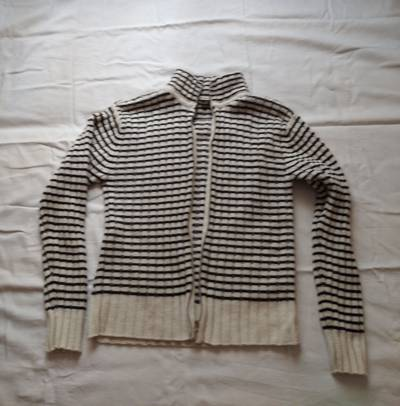

In [87]:
load_img(random_test_img_path)

In [79]:
img = load_img(random_test_img_path, target_size=(299, 299))

X = np.array(img)
X = np.array([X])

print(X.shape)

(1, 299, 299, 3)


In [80]:
# Preprocess the input
X = preprocess_input(X)

In [83]:
pred = model.predict(X)

1/1 [==============================] - 0s 105ms/step


In [86]:
class_indices = train_ds.class_indices
print(dict(zip(class_indices.keys(), pred[0])))

{'dress': -0.792034, 'hat': -5.028267, 'longsleeve': 6.367414, 'outwear': 0.13506106, 'pants': -3.8627818, 'shirt': 3.293616, 'shoes': -8.184643, 'shorts': -6.2603135, 'skirt': -5.3757167, 't-shirt': -3.123925}


## 8.13 Summary

- Using Tensorflow to train convolutional neural networks

- Transfer learning using the Xception model

- Tuning the learning rate parameter

- Using callbacks and checkpoints during training

- Handling overfitting
  - Using Regularization and Dropout
  - Data Augmentation

- Saving & Loading the Model

- Try out other datasets

- Testing the model

### Explore More

- Use other frameworks instead of Tensorflow/Keras i.e. PyTorch, MXNet

- Use other pre-trained models in addition to Xception and compare their results

- Try out Albumentations - another way of generating augmentations